# Parameter Optimization: Pipelines and GridSearchCV 

Lets investigate using pipelines and gridsearch to identify good parameter values for classifiers (and preprocessing steps)! Finding these manually can be very tedious and setting up an extensive experimental design is not always necessary -- why re-create the wheel when there is a tool out already out there!?  PIPELINES and GRIDSEARCH :)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import datasets




# Loading the Data Set
First we will use a simply data set to explore the pipeline

In [2]:
# Load Data
data = datasets.load_iris()


# Pipeline

Now lets build our pipeline from sklearn. We will include a normalization step and one classifier. This is a very simple pipeline (just about as simple as can be) -- a good first trial!

In [3]:
#Build Pipeline


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])

# Testing the pipeline

Lets split our data into test and train and run an experiment!

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size = 0.4,
                                                    random_state = 10)                               
                                                    

In [6]:
print(X_test)

[[6.3 2.3 4.4 1.3]
 [6.4 2.7 5.3 1.9]
 [5.4 3.7 1.5 0.2]
 [6.1 3.  4.6 1.4]
 [5.  3.3 1.4 0.2]
 [5.  2.  3.5 1. ]
 [6.3 2.5 4.9 1.5]
 [5.8 2.7 4.1 1. ]
 [5.1 3.4 1.5 0.2]
 [5.7 2.8 4.5 1.3]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 5.1 1.9]
 [5.5 2.3 4.  1.3]
 [4.9 3.  1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.8 3.  5.5 2.1]
 [6.  3.4 4.5 1.6]
 [4.4 3.  1.3 0.2]
 [5.1 3.7 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [7.1 3.  5.9 2.1]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [4.8 3.4 1.9 0.2]
 [5.9 3.  4.2 1.5]
 [4.7 3.2 1.3 0.2]
 [5.7 3.  4.2 1.2]
 [5.5 2.6 4.4 1.2]
 [6.8 2.8 4.8 1.4]
 [7.7 3.8 6.7 2.2]
 [6.6 2.9 4.6 1.3]
 [6.2 2.9 4.3 1.3]
 [7.2 3.  5.8 1.6]
 [5.8 2.8 5.1 2.4]
 [6.3 2.5 5.  1.9]
 [4.6 3.2 1.4 0.2]
 [6.7 3.3 5.7 2.1]
 [6.9 3.2 5.7 2.3]
 [7.7 2.6 6.9 2.3]
 [6.9 3.1 5.1 2.3]
 [5.  3.4 1.6 0.4]
 [5.  3.5 1.6 0.6]
 [5.2 2.7 3.9 1.4]
 [4.5 2.3 1.3 0.3]
 [6.3 3.3 4.7 1.6]
 [5.2 4.1 1.5 0.1]
 [6.9 3.1 4.9 1.5]
 [5.9 3.2 4.8 1.8]
 [5.6 2.8 4.9 2. ]
 [6.7 3.3 5.7 2.5]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.5 2.4 3.

# Run experiments using pipeline

You can feed in the pipeline into sklearn.cross_validate(...) and the stages within the pipeline (normalization and then classification in this pipeline) will be executed.

In [7]:
from sklearn.model_selection import cross_validate

scores = cross_validate(pipeline, X_train, y_train)

# Results

Check the scores from crossvalidation!

In [8]:
print( 'Num folds is ... ' + str(len(scores['test_score'])))
print(scores['test_score'])

Num folds is ... 5
[0.94444444 1.         1.         0.94444444 0.94444444]


In [9]:
scores['test_score'].mean()

0.9666666666666668

# Lets try some other classifiers

First import classifiers to be used. Next add them to a list and iterate.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

clfs = []
clfs.append(LogisticRegression())
clfs.append(SVC())
clfs.append(SVC())
clfs.append(KNeighborsClassifier(n_neighbors=3))
clfs.append(DecisionTreeClassifier())
clfs.append(RandomForestClassifier())
clfs.append(GradientBoostingClassifier())

for classifier in clfs:
    pipeline.set_params(clf = classifier)
    scores = cross_validate(pipeline, X_train, y_train)
    print('---------------------------------')
    print(str(classifier))
    print('-----------------------------------')
    for key, values in scores.items():
            print(key,' mean ', values.mean())
            print(key,' std ', values.std())

---------------------------------
LogisticRegression()
-----------------------------------
fit_time  mean  0.0048029422760009766
fit_time  std  0.0004002820878123819
score_time  mean  0.00019965171813964843
score_time  std  0.00039930343627929686
test_score  mean  0.9666666666666668
test_score  std  0.027216552697590882
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0012081623077392577
fit_time  std  0.00042006356655258244
score_time  mean  0.00038080215454101564
score_time  std  0.00046645139424859606
test_score  mean  0.9666666666666666
test_score  std  0.04444444444444447
---------------------------------
SVC()
-----------------------------------
fit_time  mean  0.0009966850280761718
fit_time  std  1.1087463702990774e-05
score_time  mean  0.0001998424530029297
score_time  std  0.0003996849060058594
test_score  mean  0.9666666666666666
test_score  std  0.04444444444444447
---------------------------------
KNeighborsClassifier(n_neighbors

# Lets try GridSearch to optimize some "hand-tuned" parameters for SVM 

In many instances, you may want to optimize some hand-tuned parameters of a classifier, eg, costs or penalties. This can be done using pipelines and/or GridSearch.

First import GridSearchCV. Next, supply the parameters to be tuned and a range of values to search for each. Below the kernel type and Cost value are optimized using GridSearch. Kernels investigated are linear, rbf, and poly. Cost values include 500 different samples between .00001 and 100. 

In [11]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= SVC())
pipeline.steps

[('normalizer', StandardScaler()), ('clf', SVC())]

# Optimize

Run gridsearch using .fit(...)

In [12]:
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__kernel' : ['linear', 'rbf', 'poly'],
    'clf__C' : np.linspace(0.00001,100,500)
})

cv_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([1.00000000e-05, 2.00410782e-01, 4.00811563e-01, 6.01212345e-01,
       8.01613126e-01, 1.00201391e+00, 1.20241469e+00, 1.40281547e+00,
       1.60321625e+00, 1.80361703e+00, 2.00401782e+00, 2.20441860e+00,
       2.40481938e+00, 2.60522016e+00, 2.80562094e+00, 3.00602172...
       9.53907820e+01, 9.55911828e+01, 9.57915836e+01, 9.59919844e+01,
       9.61923852e+01, 9.63927859e+01, 9.65931867e+01, 9.67935875e+01,
       9.69939883e+01, 9.71943891e+01, 9.73947898e+01, 9.75951906e+01,
       9.77955914e+01, 9.79959922e+01, 9.81963930e+01, 9.83967937e+01,
       9.85971945e+01, 9.87975953e+01, 9.89979961e+01, 9.91983969e+01,
       9.93987977e+01, 9.95991984e+01, 9.97995992e+01, 1.00000000e+02]),
                         'clf__kernel': ['linear', 'rbf', 'poly']})

# Results

Best results were obtained (.best_params_) with a cost of .200 and a linear kernel! Best score was 98 percent accurracy.

In [13]:
cv_grid.best_params_

{'clf__C': 0.20041078156312625, 'clf__kernel': 'linear'}

In [14]:
cv_grid.best_estimator_

Pipeline(steps=[('normalizer', StandardScaler()),
                ('clf', SVC(C=0.20041078156312625, kernel='linear'))])

In [15]:
cv_grid.best_score_

0.9777777777777779

# Results on test set ... 

In [16]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 95.000%


# Lets try with text data!

Loading the sentiment / lie data from Kaggle. This data was downloaded locally as tsv.

In [17]:

sourceFile = "deception_data_converted_final.tsv"
prodReviews = pd.read_table(sourceFile, delimiter="\t")
#pd.set_option('display.max_colwidth', 150)
print(prodReviews.shape)
prodReviews.head()

(92, 3)


,lie,sentiment,review
0,f,n,"'Mike\'s Pizza High Point, NY Service was very..."
1,f,n,'i really like this buffet restaurant in Marsh...
2,f,n,"'After I went shopping with some of my friend,..."
3,f,n,'Olive Oil Garden was very disappointing. I ex...
4,f,n,'The Seven Heaven restaurant was never known f...


# Lets clean the data a bit

In [18]:
prodReviews['cleanedReview'] = prodReviews['review'].str.replace("\\","")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\'","")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\t"," ")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("^\s+","")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\,","")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\s\d+\s"," ")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\.","")
prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.lower()

<ipython-input-18-0122dfe95866>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prodReviews['cleanedReview'] = prodReviews['review'].str.replace("\\","")
<ipython-input-18-0122dfe95866>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("^\s+","")
<ipython-input-18-0122dfe95866>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\,","")
<ipython-input-18-0122dfe95866>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  prodReviews['cleanedReview'] = prodReviews['cleanedReview'].str.replace("\s\d+\s"," ")
<ipython-input-18-0122dfe95866>:7: FutureWa

In [19]:
# Lets investigate the wordcounts.

prodReviews['WordCount'] = prodReviews['cleanedReview'].str.count("\S\s+\S")+1
prodReviews['WordCount'].describe()

count     92.000000
mean      71.184783
std       55.263391
min        1.000000
25%       43.000000
50%       63.000000
75%       78.750000
max      458.000000
Name: WordCount, dtype: float64

# Lets Explore :)

In [20]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jerem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


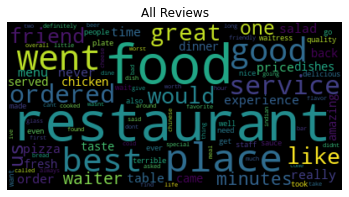

In [21]:
allReviews = " ".join(rv for rv in prodReviews['cleanedReview'])

# Next for EDA, lets investigate word frequency. Create a word cloud to help visualize. 

wordcloud = WordCloud(background_color='black', max_words=100, stopwords=stopwords.words('english')).generate(allReviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("All Reviews")
plt.axis("off")
plt.show()

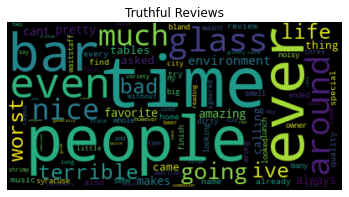

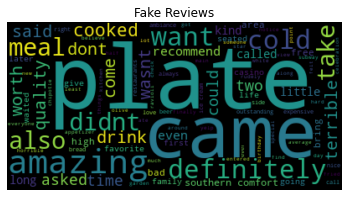

In [22]:
## Define the stop words

lieStopWords = stopwords.words('english')
# Remmove most common words across categories
lieStopWords.extend(["restaurant","food","place","went","would"])
lieStopWords.extend(["friends","friend","like","good","best","great","service","ordered","us"])
##Remove food types
lieStopWords.extend(["chicken","pizza","chinese","japanese","salad","iced","tea","sushi","tofu","indian","noodle","cheese","chocolate","sauce","eggs","coffee","steak","pasta"])
## Remove common restaurant nouns
lieStopWords.extend(["dining","dinner","dine","dish","dishes","waiters","waiter","waitress","menu"])
## Remove generic concepts
lieStopWords.extend(["experience","order","really"])
#Remove other key words common across categories
lieStopWords.extend(["never","one","served","price","staff","back","delicious","flavor","found","fresh","friendly","get","go"])
lieStopWords.extend(["hour","last","minutes","made","need","overall","prices","table","taste","took","wait","well"])

## Preview the stop words in word clouds

prodReviewsTrue = prodReviews[prodReviews['lie'] =='t']
trueReviews = " ".join(rv for rv in prodReviewsTrue['cleanedReview'])

wordcloud = WordCloud(background_color='black', max_words=100, stopwords=lieStopWords).generate(trueReviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Truthful Reviews")
plt.axis("off")
plt.show()

prodReviewsFalse = prodReviews[prodReviews['lie'] =='f']
falseReviews = " ".join(rv for rv in prodReviewsFalse['cleanedReview'])

wordcloud = WordCloud(background_color='black', max_words=100, stopwords=lieStopWords).generate(falseReviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Fake Reviews")
plt.axis("off")
plt.show()

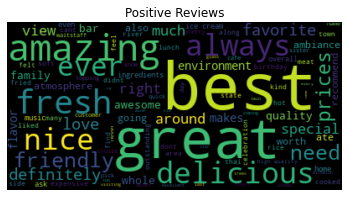

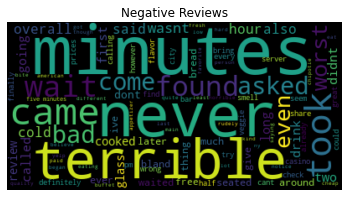

In [23]:
sentStopWords = stopwords.words('english')
# Remmove most common words across categories
sentStopWords.extend(["restaurant","restaurants","food","place","went"])
sentStopWords.extend(["good","like","go"])
sentStopWords.extend(["service","order","ordered","us","friend","friends","would"])
sentStopWords.extend(["back","experience","life","taste","time","serve","served"])
## Remove common restaurant nouns
sentStopWords.extend(["dining","dinner","dine","dish","dishes","waiters","waiter","waitress","menu"])
##Remove food types
sentStopWords.extend(["chicken","pizza","chinese","japanese","salad","iced","tea","sushi","tofu","indian","noodle","cheese","chocolate","sauce","eggs","coffee","steak","pasta","beer"])
## Remove additional common words
sentStopWords.extend(["get","little","made","meal","one","people","plate","price","really","staff","table","take","want","well"])


## Preview the stop words in word clouds

prodReviewsPositive = prodReviews[prodReviews['sentiment'] =='p']
posReviews = " ".join(rv for rv in prodReviewsPositive['cleanedReview'])

wordcloud = WordCloud(background_color='black', max_words=100, stopwords=sentStopWords).generate(posReviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Positive Reviews")
plt.axis("off")
plt.show()

prodReviewsNegative = prodReviews[prodReviews['sentiment'] =='n']
negativeReviews = " ".join(rv for rv in prodReviewsNegative['cleanedReview'])

wordcloud = WordCloud(background_color='black', max_words=100, stopwords=sentStopWords).generate(negativeReviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Negative Reviews")
plt.axis("off")
plt.show()

In [24]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

allReviewTokens = TreebankWordTokenizer().tokenize(allReviews)
lieReviewTokens = []
lieReviewStemmedTokens = []
sentReviewTokens = []
sentReviewStemmedTokens = []
for tk in allReviewTokens:
    stemmedTk = stemmer.stem(tk)
    if lieStopWords.count(tk) == 0:
        lieReviewTokens.append(tk)
        if (lieStopWords.count(stemmedTk) == 0):
            lieReviewStemmedTokens.append(stemmedTk)
    if sentStopWords.count(tk) == 0:
        sentReviewTokens.append(tk)
        if (sentStopWords.count(stemmedTk) == 0):
            sentReviewStemmedTokens.append(stemmedTk)

print("Most Frequent Words for Lie Detection")
lieReviewFreq = nltk.FreqDist(lieReviewTokens)
print(lieReviewFreq.most_common(50))
print()
print("Most Frequent Words for Lie Detection (Stemmed)")
lieReviewFreq = nltk.FreqDist(lieReviewStemmedTokens)
print(lieReviewFreq.most_common(50))
print()
print("Most Frequent Words for Sentiment 'Identification'")
sentReviewFreq = nltk.FreqDist(sentReviewTokens)
print(sentReviewFreq.most_common(50))
print()
print("Most Frequent Words for Sentiment Identification (Stemmed)")
sentReviewFreq = nltk.FreqDist(sentReviewStemmedTokens)
print(sentReviewFreq.most_common(50))

Most Frequent Words for Lie Detection
[('!', 152), ('(', 19), (')', 18), (':', 16), ('plate', 15), ('time', 14), ('amazing', 14), ('came', 13), ('ever', 13), ('terrible', 12), ('even', 12), ('also', 11), ('people', 11), ('want', 11), ('nice', 11), ('?', 11), ('quality', 10), ('definitely', 10), ('bad', 10), ('going', 10), ('life', 10), ('around', 10), ('take', 10), ('much', 10), ('meal', 9), ('asked', 9), ('didnt', 9), ('favorite', 9), ('wasnt', 9), ('cooked', 9), ('always', 9), ('cold', 8), ('dont', 8), ('two', 8), ('worst', 8), ('called', 8), ('come', 8), ('little', 8), ('long', 8), ('glass', 8), ('said', 7), ('first', 7), ('cant', 7), ('worth', 7), ('special', 7), ('bread', 7), ('find', 7), ('ive', 7), ('environment', 7), ('recommend', 6)]

Most Frequent Words for Lie Detection (Stemmed)
[('!', 152), ('(', 19), (')', 18), ('time', 18), ('call', 17), ('plate', 16), (':', 16), ('ask', 15), ('amaz', 14), ('came', 13), ('ever', 13), ('come', 12), ('terribl', 12), ('even', 12), ('want', 

In [25]:
def stemText(txt):
    tkns = TreebankWordTokenizer().tokenize(txt)
    newTkns = []
    for t in tkns:
        newTkns.append(stemmer.stem(t))
    newTxt = " ".join(newTkns)
    return newTxt

#stemText("life's like a bag of chocolates")

In [26]:
prodReviews['stemmedReview'] = prodReviews['cleanedReview'].apply(stemText)

modelDf = pd.DataFrame(prodReviews.drop(columns=['review','cleanedReview','stemmedReview']), copy=True)
#modelDf['isPositive'] = modelDf['sentiment'].mask(modelDf['sentiment'] == 'n',0)
#modelDf['isPositive'] = modelDf['isPositive'].mask(modelDf['isPositive'] == 'p',1)
#modelDf = modelDf.drop(columns=['sentiment'])
modelDf.head()

,lie,sentiment,WordCount
0,f,n,43
1,f,n,58
2,f,n,22
3,f,n,41
4,f,n,63


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Here we add some helper functions.

In [28]:
def getFeatureVector(vectorizer, wordList, modelDf, columnToDrop):
    featureVector = vectorizer.fit_transform(wordList)
    featureVectorDf = pd.DataFrame(columns=vectorizer.get_feature_names(), data=featureVector.todense())
    modelWithFeatureDf = modelDf.join(featureVectorDf)
    modelWithFeatureVector = modelWithFeatureDf.drop(columns=["WordCount", columnToDrop])
    return modelWithFeatureVector

def getCountVectorizer(binary=False, ngram=(1,1), minDocFreq=.03, maxDocFreq=.4, maxFeat=50, sw=None):
    if (stopwords == None):
        return CountVectorizer(encoding='latin-1', binary=True, ngram_range=ngram, min_df=minDocFreq, max_df=maxDocFreq, max_features=maxFeat, lowercase=True)
    else:
        return CountVectorizer(encoding='latin-1', binary=True, ngram_range=ngram, min_df=minDocFreq, max_df=maxDocFreq, max_features=maxFeat, stop_words=sw, lowercase=True)

def getTfidfVectorizer(ngram=(1,1), minDocFreq=.03, maxDocFreq=.4, maxFeat=50, sw=None):
    if (stopwords == None):
        return TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=ngram, min_df=minDocFreq, max_df=maxDocFreq, max_features=maxFeat, lowercase=True)
    else:
        return TfidfVectorizer(encoding='latin-1', use_idf=True, ngram_range=ngram, min_df=minDocFreq, max_df=maxDocFreq, max_features=maxFeat, stop_words=sw, lowercase=True)


Next we can experiment with different vectorization strategies. In the next section we show how to do this using pipelines instead -- MUCH MORE EFFICIENT :)

In [29]:
#  unigram boolean vectorizer, set minimum document frequency to 5
#unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words=sentStopWords, max_features=200, lowercase=True)
#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words=sentStopWords, max_features=200, lowercase=True)
# unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words=sentStopWords, max_features=200, lowercase=True)

#  bigram term frequency vectorizer, set minimum document frequency to 5
# bigram_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(2,3), min_df=5, stop_words=sentStopWords, max_features=200, lowercase=True)


#unigram_bool_v = unigram_bool_vectorizer.fit_transform(prodReviews['review'].values)




#unigram_bool_v = unigram_bool_vectorizer.fit_transform(tweetsDf['Tweet'].values)
#unigram_count_v = unigram_count_vectorizer.fit_transform(prodReviews['review'].values)
#bigram_count_v = bigram_count_vectorizer.fit_transform(tweetsDf['Tweet'].values)
unigram_tfidf_v = unigram_tfidf_vectorizer.fit_transform(prodReviews['review'].values)

print(unigram_tfidf_v.shape)

#unigram_bool_df = pd.DataFrame(columns=unigram_bool_vectorizer.get_feature_names(), data=unigram_bool_v.todense())
#unigram_count_df = pd.DataFrame(columns=unigram_count_vectorizer.get_feature_names(), data=unigram_count_v.todense())
#bigram_count_df = pd.DataFrame(columns=bigram_count_vectorizer.get_feature_names(), data=bigram_count_v.todense())
unigram_tfidf_df = pd.DataFrame(columns=unigram_tfidf_vectorizer.get_feature_names(), data=unigram_tfidf_v.todense())


(92, 73)


In [30]:
data.data = unigram_tfidf_df

In [31]:
data.target = prodReviews['sentiment'].values

# Experiments

Split data into test and train sets and run our grid search on the vectorized sentiment data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target,
                                                    test_size = 0.4,
                                                    random_state = 10)    

In [33]:
print(X_test)

          15   already      also    always   amazing  ambiance    around  \
39  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
56  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
34  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
19  0.230859  0.000000  0.000000  0.000000  0.000000  0.230859  0.000000   
55  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
35  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
61  0.000000  0.000000  0.352856  0.352856  0.000000  0.000000  0.000000   
43  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
89  0.000000  0.000000  0.000000  0.000000  0.432428  0.000000  0.000000   
38  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1   0.000000

In [34]:
print(y_test)

['n' 'p' 'n' 'n' 'n' 'p' 'n' 'p' 'n' 'p' 'n' 'n' 'n' 'p' 'p' 'n' 'p' 'p'
 'p' 'n' 'p' 'n' 'n' 'p' 'p' 'p' 'p' 'n' 'p' 'p' 'p' 'n' 'p' 'n' 'n' 'n'
 'n']


In [35]:
cv_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('normalizer', StandardScaler()),
                                       ('clf', SVC())]),
             param_grid={'clf__C': array([1.00000000e-05, 2.00410782e-01, 4.00811563e-01, 6.01212345e-01,
       8.01613126e-01, 1.00201391e+00, 1.20241469e+00, 1.40281547e+00,
       1.60321625e+00, 1.80361703e+00, 2.00401782e+00, 2.20441860e+00,
       2.40481938e+00, 2.60522016e+00, 2.80562094e+00, 3.00602172...
       9.53907820e+01, 9.55911828e+01, 9.57915836e+01, 9.59919844e+01,
       9.61923852e+01, 9.63927859e+01, 9.65931867e+01, 9.67935875e+01,
       9.69939883e+01, 9.71943891e+01, 9.73947898e+01, 9.75951906e+01,
       9.77955914e+01, 9.79959922e+01, 9.81963930e+01, 9.83967937e+01,
       9.85971945e+01, 9.87975953e+01, 9.89979961e+01, 9.91983969e+01,
       9.93987977e+01, 9.95991984e+01, 9.97995992e+01, 1.00000000e+02]),
                         'clf__kernel': ['linear', 'rbf', 'poly']})

# Optimization Results

What was the best score?

What was the best parameter set?



In [36]:
cv_grid.best_params_

{'clf__C': 0.6012123446893787, 'clf__kernel': 'rbf'}

In [37]:
cv_grid.best_score_

0.8181818181818183

# Results on test set?

In [38]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 72.973%


# Optimizing Parameters for multiple stages of the pipeline

Preprocessing often has many many hand-tuned parameters! So designing an experiment to identify optimal processing parameters is intuitive. Conveniently, we can incorporate this into the pipeline and GridSearch!!

Vectorizing text data often has many parameter options: stopwords, tfidf scaling, stemming options, frequency constraints, etc. SVMs also many many parameter options: kernel, cost, etc. We can include vectorization and classification in the pipeline and include the relevant parameters in the GridSearch param_grid. 

Note that GridSearch runs crossvalidation for all possible parameter combinations!! This can be slow so choose your parameter search params wisely. Also note that you can choose the number of crossvalidation cv folds and have the option to parallelize across multiple cores via n_jobs. See below example. 

In [50]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC()),
])

param_grid = {
    'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
    'tfidf__stop_words': ['english', None,sentStopWords ],
    'clf__kernel' : ['linear', 'rbf', 'poly'],
    'clf__C' : np.linspace(0.01,10,200)
}

gscv = GridSearchCV(pipeline, param_grid, cv=2, n_jobs=12, return_train_score=True, verbose=3)

X_train, X_test, y_train, y_test = train_test_split(prodReviews['stemmedReview'], 
                                                    prodReviews['sentiment'],
                                                    test_size = 0.25,
                                                    random_state = 10)  

# Use the cleaned and stemmed data OR the raw review ... try each :)
gscv.fit(X_train, y_train)
#gscv.fit(prodReviews['review'], prodReviews['sentiment'])

Fitting 2 folds for each of 7200 candidates, totalling 14400 fits


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 424 tasks      | elapsed:    2.0s
[Parallel(n_jobs=12)]: Done 1704 tasks      | elapsed:    7.7s
[Parallel(n_jobs=12)]: Done 3496 tasks      | elapsed:   15.5s
[Parallel(n_jobs=12)]: Done 5800 tasks      | elapsed:   26.0s
[Parallel(n_jobs=12)]: Done 8616 tasks      | elapsed:   39.6s
[Parallel(n_jobs=12)]: Done 11944 tasks      | elapsed:   58.4s
[Parallel(n_jobs=12)]: Done 14400 out of 14400 | elapsed:  1.2min finished


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', SVC())]),
             n_jobs=12,
             param_grid={'clf__C': array([ 0.01      ,  0.06020101,  0.11040201,  0.16060302,  0.21080402,
        0.26100503,  0.31120603,  0.36140704,  0.41160804,  0.46180905,
        0.51201005,  0.56221106,  0.61241206,  0.66261307,  0.71281407,
        0.76301508,  0.81321608,  0.86341709,  0.91361809,  0.9638191 ,
        1.0140201 ,  1...
                         'clf__kernel': ['linear', 'rbf', 'poly'],
                         'tfidf__max_df': (0.25, 0.5, 0.75, 1.0),
                         'tfidf__stop_words': ['english', None,
                                               ['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'

# Optimization Results

In [51]:
gscv.best_params_


{'clf__C': 0.8634170854271357,
 'clf__kernel': 'linear',
 'tfidf__max_df': 1.0,
 'tfidf__stop_words': None}

In [52]:
gscv.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=0.8634170854271357, kernel='linear'))])

In [53]:
gscv.best_score_

0.9130252100840336

# Results on Test Set

In [54]:

#gscv.fit(X_train, y_train)
y_predict = gscv.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 82.609%
